In [37]:
import pandas as pd 
import numpy as np 
import seaborn as sbn 
import matplotlib.pyplot as plt 

In [60]:
df = pd.read_csv("ola.csv", index_col = 0)
df.head(10)

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
5,12/01/19,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
6,01/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
7,02/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
8,03/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,350000,1
9,04/01/20,4,43.0,0.0,C13,2,65603,12/07/19,27/04/20,2,2,0,1


In [61]:
df['Grade'].value_counts()

Grade
2    6627
1    5202
3    4826
4    2144
5     305
Name: count, dtype: int64

In [62]:
df['Quarterly Rating'].value_counts()

Quarterly Rating
1    7679
2    5553
3    3895
4    1977
Name: count, dtype: int64

In [63]:
df['Joining Designation'].value_counts()

Joining Designation
1    9831
2    5955
3    2847
4     341
5     130
Name: count, dtype: int64

In [9]:
df['Education_Level'].value_counts()

Education_Level
1    6864
2    6327
0    5913
Name: count, dtype: int64

### Let's Understand the DATA --- Initial Guesses, I am writing down

1) The Dateofjoining column is date when the driver joined the OLA ecosystem.
2) The first column MMM-YY seems the date when the driver utilized OLA platform and offered service - so i can use how long it took him to start using OLA after joining the platform.
3) Observe carefully, for each driver (having a unique Driver_ID) there are multiple rows, indicating his number of trips. Each column is a signal that he was active on that day and gave service.
4) LastWorkingDate column indicates that if the value is NaN, he is still part of OLA network. If there is a value of date present there, it indicates he deleted his account from OLA platform.
5) The data given to us is for year 2019 and 2020. So i can also know that which drivers are still active in 2020.
6) Gender column might be skewed. I have to see it. 
7) More elder and more younger drivers might have random behaviour.
8) City might affect churn behaviour of a driver because it can be case that there are no people in that city interested in booking cabs and that too with a OLA.
9) Education level is also an factor because maybe some drivers would have joined OLA because of unemployment? 
10) Income is also a key factor. Here it seems income is represented in some form of encoding, would have to look into it.



### Here is the information provided by OLA

1) Gender : Gender of the driver – Male : 0, Female: 1
2) MMMM-YY : Reporting Date (Monthly)
3) Education_Level : Education level – 0 for 10+ ,1 for 12+ ,2 for graduate
4) Income : Monthly average Income of the driver
5) The total business value acquired by the driver in a month (negative business indicates cancellation/refund or car EMI adjustments)
6) Quarterly Rating : Quarterly rating of the driver: 1,2,3,4,5 (higher is better)




#### From ChatGPT: 

Total Business Value (TBV): This is the sum total of all financial gains and losses associated with the driver's operations within a given month.

Positive Value: If the TBV is positive, it indicates the total earnings and profits generated by the driver during the month. This can include revenue from completed rides, tips, and any additional income.

Negative Value: If the TBV is negative, it suggests that the driver experienced losses or incurred expenses that outweighed their earnings. Possible reasons for a negative TBV include cancellations or refunds, adjustments for car loan EMI (Equated Monthly Installment), or other costs that exceeded the driver's income.

Cancellations or refunds might occur if a driver cancels a ride or if a passenger requests and receives a refund. Car EMI adjustments suggest that a portion of the negative business value could be attributed to adjustments related to the driver's car loan EMI.



##### I can hypothise that a person having taken a loan from OLA, have higher chance of Quitting, because he might not be able to generate enough income to payback the EMI and book a profit

In [39]:
# let's compress the rows for each driver

# but first let's store all columns in a list

cols = df.columns

In [64]:
agg = {'MMM-YY': 'last',
 'Age': 'last',
 'Gender': 'last',
 'City': 'last',
 'Education_Level': 'last',
 'Income': 'last',
 'Dateofjoining': 'last',
 'LastWorkingDate': 'last',
 'Joining Designation': 'last',
 'Grade': 'last',
 'Total Business Value': 'sum',
 'Quarterly Rating': 'last'}

In [65]:
new_df = df.groupby('Driver_ID').aggregate(agg).reset_index()
new_df.head()

,Driver_ID,MMM-YY,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,1,03/01/19,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,1715580,2
1,2,12/01/20,31.0,0.0,C7,2,67016,11/06/20,None,2,2,0,1
2,4,04/01/20,43.0,0.0,C13,2,65603,12/07/19,27/04/20,2,2,350000,1
3,5,03/01/19,29.0,0.0,C9,0,46368,01/09/19,03/07/19,1,1,120360,1
4,6,12/01/20,31.0,1.0,C11,1,78728,31/07/20,None,3,3,1265000,2


In [66]:
new_df['Dateofjoining'] = pd.to_datetime(new_df['Dateofjoining'], format='%d/%m/%y')
new_df['LastWorkingDate'] = pd.to_datetime(new_df['LastWorkingDate'], format='%d/%m/%y')
new_df['MMM-YY'] = pd.to_datetime(new_df['MMM-YY'], format='%m/%d/%y')

# Always be careful and observe data to find what is the date format given.

In [67]:
new_df = new_df.rename(columns = {'MMM-YY':'LastReport'})
new_df.head()

,Driver_ID,LastReport,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,1,2019-03-01,28.0,0.0,C23,2,57387,2018-12-24,2019-11-03,1,1,1715580,2
1,2,2020-12-01,31.0,0.0,C7,2,67016,2020-06-11,NaT,2,2,0,1
2,4,2020-04-01,43.0,0.0,C13,2,65603,2019-07-12,2020-04-27,2,2,350000,1
3,5,2019-03-01,29.0,0.0,C9,0,46368,2019-09-01,2019-07-03,1,1,120360,1
4,6,2020-12-01,31.0,1.0,C11,1,78728,2020-07-31,NaT,3,3,1265000,2


#### Further Information



In [68]:
df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'], format='%d/%m/%y')
df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'], format='%d/%m/%y')
df['MMM-YY'] = pd.to_datetime(df['MMM-YY'], format='%m/%d/%y')

# Always be careful and observe data to find what is the date format given.

In [69]:
# this data tells about when driver joined the OLA network and when he Came to first Report for duty.
# the report column in MMM-YY
driver_join_data = df.groupby('Driver_ID').agg({'MMM-YY': 'first', 'Dateofjoining': 'first', 'LastWorkingDate':'last'})
driver_join_data = driver_join_data.rename(columns = {"MMM-YY":"FirstReport"})
driver_join_data.head()

,FirstReport,Dateofjoining,LastWorkingDate
Driver_ID,,,
1,2019-01-01,2018-12-24,2019-11-03
2,2020-11-01,2020-06-11,NaT
4,2019-12-01,2019-07-12,2020-04-27
5,2019-01-01,2019-09-01,2019-07-03
6,2020-08-01,2020-07-31,NaT


In [70]:
driver_join_data['Firstreport_leadtime'] = (driver_join_data['FirstReport'] - driver_join_data['Dateofjoining']).dt.days
driver_join_data.head()

,FirstReport,Dateofjoining,LastWorkingDate,Firstreport_leadtime
Driver_ID,,,,
1,2019-01-01,2018-12-24,2019-11-03,8
2,2020-11-01,2020-06-11,NaT,143
4,2019-12-01,2019-07-12,2020-04-27,142
5,2019-01-01,2019-09-01,2019-07-03,-243
6,2020-08-01,2020-07-31,NaT,1


### As we can see that it is possible that drivers who have first reported (mostly for inquiry but are given id by system) and later joined OLA online platform have negative Firstreport_leadtime
### For drivers who have online registered themselves but not reported in office, they have positive Firstreport_leadtime


In [71]:
# so to consider the total_service_days of a driver on ola platform, i will consider the first_report_date and last_working_date
driver_join_data['service_days'] = (driver_join_data['LastWorkingDate'] - driver_join_data['FirstReport']).dt.days
driver_join_data.head()

,FirstReport,Dateofjoining,LastWorkingDate,Firstreport_leadtime,service_days
Driver_ID,,,,,
1,2019-01-01,2018-12-24,2019-11-03,8,306.0
2,2020-11-01,2020-06-11,NaT,143,NaN
4,2019-12-01,2019-07-12,2020-04-27,142,148.0
5,2019-01-01,2019-09-01,2019-07-03,-243,183.0
6,2020-08-01,2020-07-31,NaT,1,NaN


#### It is logical that for those drivers who have LastWorkingDate as Not available - They are still connected to OLA platform. So to consider their serive_days i would consider it with respect to a reference date i.e. 31st december 2020. (Remember, we have data for 2019 & 2020 only)

In [72]:
driver_join_data['LastWorkingDate'] = driver_join_data['LastWorkingDate'].fillna(pd.to_datetime('2020-12-31'))
driver_join_data['service_days'] = (driver_join_data['LastWorkingDate'] - driver_join_data['FirstReport']).dt.days
driver_join_data.head()

,FirstReport,Dateofjoining,LastWorkingDate,Firstreport_leadtime,service_days
Driver_ID,,,,,
1,2019-01-01,2018-12-24,2019-11-03,8,306
2,2020-11-01,2020-06-11,2020-12-31,143,60
4,2019-12-01,2019-07-12,2020-04-27,142,148
5,2019-01-01,2019-09-01,2019-07-03,-243,183
6,2020-08-01,2020-07-31,2020-12-31,1,152


In [73]:
driver_join_data = driver_join_data.reset_index()

In [74]:
# Now let's join the Firstreport_leadtime and service_days data to new_df
new_df['churn'] = new_df['LastWorkingDate'].notna().astype(int).tolist()

In [75]:
driver_join_data = driver_join_data[driver_join_data['service_days'] > 0]

In [76]:
new_df = new_df.merge(driver_join_data[['Driver_ID', 'Firstreport_leadtime', 'service_days']], on = 'Driver_ID', how = 'left')
new_df = new_df.drop(columns = ['LastReport', 'Dateofjoining', 'LastWorkingDate'] )
new_df.head()

,Driver_ID,Age,Gender,City,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,churn,Firstreport_leadtime,service_days
0,1,28.0,0.0,C23,2,57387,1,1,1715580,2,1,8.0,306.0
1,2,31.0,0.0,C7,2,67016,2,2,0,1,0,143.0,60.0
2,4,43.0,0.0,C13,2,65603,2,2,350000,1,1,142.0,148.0
3,5,29.0,0.0,C9,0,46368,1,1,120360,1,1,-243.0,183.0
4,6,31.0,1.0,C11,1,78728,3,3,1265000,2,0,1.0,152.0


In [78]:
new_df = new_df.dropna()

## It's show time

In [16]:
import sweetviz as sv 
my_report = sv.analyze(source= new_df, target_feat='churn')
my_report.show_html() 

/Users/arjun/Documents/Projects/OLA/new/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [17]:
# See the visualizations in SWEETVIZ_REPORT.pdf

1) 68% Churn data and 32% Non-churn Data. As the churn rate is high, this is a concern to our OLA client
2) Age group 26 to 32 is most frequent
3) Gender and Driver_ID shows no relation with churn, hence remove them
4) City is also not an effective predictive feature.
5) Income is a strong predictor
6) Income, Grade and Designation are higly related to each other
7) Quaterly rating and business value are very good predictor

In [79]:
new_df['Age'] = new_df['Age'].astype('int32')
new_df = new_df.drop(columns = ['Driver_ID','City','Gender'])
new_df.head()

,Age,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,churn,Firstreport_leadtime,service_days
0,28,2,57387,1,1,1715580,2,1,8.0,306.0
1,31,2,67016,2,2,0,1,0,143.0,60.0
2,43,2,65603,2,2,350000,1,1,142.0,148.0
3,29,0,46368,1,1,120360,1,1,-243.0,183.0
4,31,1,78728,3,3,1265000,2,0,1.0,152.0


In [81]:
X = new_df.drop('churn', axis = 1)
y = new_df['churn']

## Model Training Phase


In [20]:
# I have less data so i will use cross-validation

In [33]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb 
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline 
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, 
                                                    stratify = y, random_state = 500)

# stratify is used because data is imbalanced.

In [83]:
X_train.shape,X_test.shape

((1730, 9), (577, 9))

### Logistic Regression (Industry Favorite)

In [84]:
degree = 2
C_value = 0.1

model = make_pipeline(
    PolynomialFeatures(degree),
    MinMaxScaler(),
    LogisticRegression(C=C_value)
)

kf = KFold(n_splits = 5, shuffle = True, random_state = 500)
cv_scores = cross_val_score(model, X_train.values, y_train.values, cv=kf, scoring='f1')  

print(f'Mean CV Score: {np.mean(cv_scores)}')

Mean CV Score: 0.8617334197769931


In [85]:
model.fit(X_train, y_train)
preds = model.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.90      0.51      0.65       191
           1       0.80      0.97      0.88       386

    accuracy                           0.82       577
   macro avg       0.85      0.74      0.76       577
weighted avg       0.83      0.82      0.80       577



In [27]:
#Hyperparameter Tuning using Optuna
import optuna

def objective(trial):
    # Define the hyperparameter search space
    degree = trial.suggest_int('degree', 2, 4)
    C_value = trial.suggest_float('C_value', 0.01, 10.0, step=0.01)

    # Create the pipeline with suggested hyperparameters
    model = Pipeline([
        ('poly_features', PolynomialFeatures(degree)),
        ('minmax_scaler', MinMaxScaler()),
        ('logistic_regression', LogisticRegression(C=C_value))
    ])

    # Use KFold for cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=500)

    # Cross-validate the pipeline and return the mean F1 score
    cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='f1')
    return np.mean(cv_scores)

# Optimize hyperparameters using Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=40)

# Get the best hyperparameters
best_params = study.best_params
best_degree = best_params['degree']
best_C_value = best_params['C_value']

# Print the best hyperparameters
print(f'Best Degree: {best_degree}')
print(f'Best C Value: {best_C_value}')

# Create the final model with the best hyperparameters
final_model = Pipeline([
    ('poly_features', PolynomialFeatures(best_degree)),
    ('minmax_scaler', MinMaxScaler()),
    ('logistic_regression', LogisticRegression(C=best_C_value))
])

# Fit the final model on the training data
final_model.fit(X_train, y_train)

# Evaluate on the test set
test_score = final_model.score(X_test, y_test)

# Display the test score
print(f'Test Score: {test_score}')

[I 2024-02-06 18:55:47,229] A new study created in memory with name: no-name-6fcd5b2b-bcaf-4fce-9299-a98e06558da1
[I 2024-02-06 18:55:48,174] Trial 0 finished with value: 0.873842853345131 and parameters: {'degree': 2, 'C_value': 8.27}. Best is trial 0 with value: 0.873842853345131.
[I 2024-02-06 18:55:48,595] Trial 1 finished with value: 0.8739249976717076 and parameters: {'degree': 2, 'C_value': 7.21}. Best is trial 1 with value: 0.8739249976717076.
[I 2024-02-06 18:55:49,338] Trial 2 finished with value: 0.8759113286071563 and parameters: {'degree': 2, 'C_value': 1.8800000000000001}. Best is trial 2 with value: 0.8759113286071563.
[I 2024-02-06 18:55:49,863] Trial 3 finished with value: 0.8757092307312199 and parameters: {'degree': 2, 'C_value': 2.17}. Best is trial 2 with value: 0.8759113286071563.
/Users/arjun/Documents/Projects/OLA/new/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of IT

Best Degree: 3
Best C Value: 8.02
Test Score: 0.8322147651006712


In [28]:
preds1 = final_model.predict(X_test)
print(classification_report(y_test, preds1))

              precision    recall  f1-score   support

           0       0.83      0.60      0.70       191
           1       0.83      0.94      0.88       405

    accuracy                           0.83       596
   macro avg       0.83      0.77      0.79       596
weighted avg       0.83      0.83      0.82       596



# Let's go with RandomForest

In [86]:
model2 = RandomForestClassifier(class_weight = 'balanced')
model2.fit(X_train, y_train)

y_pred1  = model2.predict(X_test)

print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85       191
           1       0.91      0.95      0.93       386

    accuracy                           0.90       577
   macro avg       0.90      0.88      0.89       577
weighted avg       0.90      0.90      0.90       577



In [ ]:
# without any finetuning, we are getting good results compare to LogisticRegression

In [88]:
import optuna
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 100,1000, step = 100)
    max_depth = trial.suggest_int('max_depth', 3,20,step = 1)

    model = RandomForestClassifier(n_estimators = n_estimators, max_depth = max_depth )
    kf = KFold(n_splits=5, shuffle=True, random_state=500)

    # Cross-validate the pipeline and return the mean F1 score
    cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='f1')
    return np.mean(cv_scores)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=15)

# Get the best hyperparameters
best_params = study.best_params
n_estimators = best_params['n_estimators']
max_depth = best_params['max_depth']    

/Users/arjun/Documents/Projects/OLA/new/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2024-02-06 20:50:25,288] A new study created in memory with name: no-name-9d09ad5f-7e26-43c8-9795-9411511fe8b8
[I 2024-02-06 20:50:29,219] Trial 0 finished with value: 0.9107288630785059 and parameters: {'n_estimators': 700, 'max_depth': 15}. Best is trial 0 with value: 0.9107288630785059.
[I 2024-02-06 20:50:33,786] Trial 1 finished with value: 0.8983124409025125 and parameters: {'n_estimators': 1000, 'max_depth': 7}. Best is trial 0 with value: 0.9107288630785059.
[I 2024-02-06 20:50:34,253] Trial 2 finished with value: 0.9025378010298437 and parameters: {'n_estimators': 100, 'max_depth': 7}. Best is trial 0 with value: 0.9107288630785059.
[I 2024-02-06 20:50:34,828] Trial 3 finished with value: 0.91057163950667

In [90]:
max_depth, n_estimators

(18, 500)

In [91]:
model3 = RandomForestClassifier(class_weight = 'balanced', n_estimators =n_estimators,
                                 max_depth = max_depth, random_state = 500)
model3.fit(X_train, y_train)

y_pred2  = model3.predict(X_test)

print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84       191
           1       0.90      0.95      0.93       386

    accuracy                           0.90       577
   macro avg       0.90      0.87      0.89       577
weighted avg       0.90      0.90      0.90       577



# Now let's go with XGBOOST

In [92]:
classes = dict(y_train.value_counts())

scale_pos_weight = classes[0]/classes[1]
scale_pos_weight

0.49653979238754326

In [93]:
model4 = xgb.XGBClassifier(scale_pos_weight=scale_pos_weight, random_state = 500)
model4.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=500, ...)

In [94]:
y_pred2 = model4.predict(X_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       191
           1       0.97      0.95      0.96       386

    accuracy                           0.95       577
   macro avg       0.94      0.94      0.94       577
weighted avg       0.95      0.95      0.95       577



### XGBOOST ROCKS !!! THUG LIFE :)

In [95]:
imp = model4.feature_importances_
name = model4.feature_names_in_

In [96]:
Feat_imp = pd.DataFrame({'Feature': name, 'Importance':imp})
Feat_imp.sort_values(by = 'Importance', ascending = False)

,Feature,Importance
6,Quarterly Rating,0.582905
8,service_days,0.125010
3,Joining Designation,0.107647
7,Firstreport_leadtime,0.083407
5,Total Business Value,0.034415
2,Income,0.019154
0,Age,0.019019
4,Grade,0.015315
1,Education_Level,0.013128


### Just Imagine: 58% Impact just by Quaterly Rating. It is necessary to get a better rating system and to provide proper incentives to drivers, else they will keep moving out.

### How many days has that driver stayed in the OLA system is second most imp feature. Those who have churned, have stayed more days with OLA. it may be that although they have been around for so long, still their rating is not high hence they leaved.



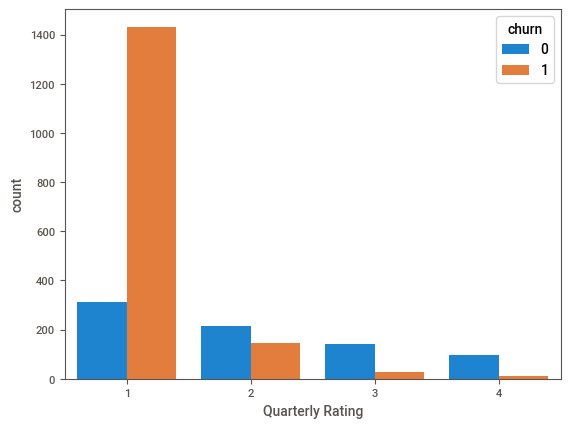

In [ ]:
sbn.countplot(x = new_df['Quarterly Rating'], hue = new_df['churn'])
plt.show()

In [ ]:
first_rank  = new_df[new_df['Quarterly Rating'] == 1]

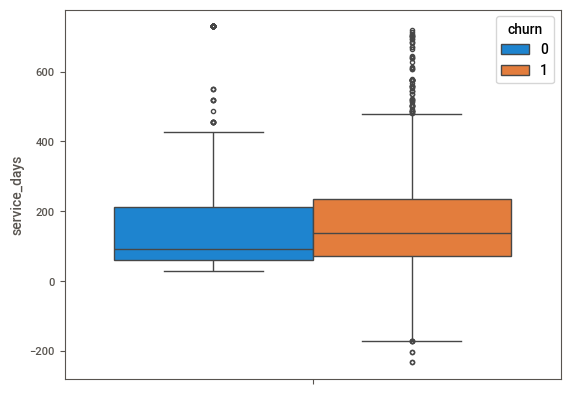

In [ ]:
sbn.boxplot(y=first_rank['service_days'], hue = first_rank['churn'])
plt.show()

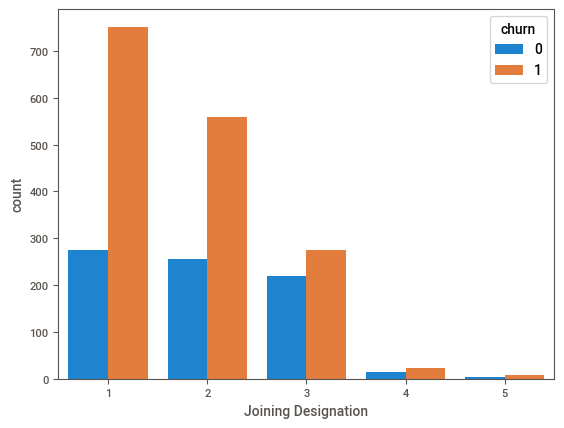

In [ ]:
sbn.countplot(x = new_df['Joining Designation'], hue = new_df['churn'])
plt.show()

### it seems the drivers are getting lower designation and lower rating hence they are leaving
### so it is required to check whethere they are not getting enough rides or they are lazy
### We need further data which can help us analyze the enthusiasm of a driver. how actively he is taking rides?


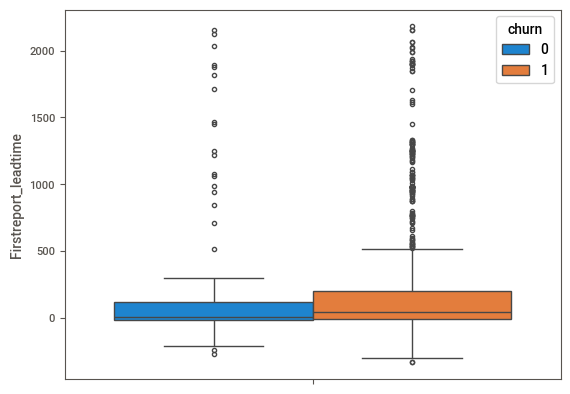

In [ ]:
sbn.boxplot(y=first_rank['Firstreport_leadtime'], hue = first_rank['churn'])
plt.show()

In [ ]:
# this also says that those who churned when their quater rank = 1, they came late to report

In [ ]:
# import pickle
# with open('model.pkl', 'wb') as handle:
#     pickle.dump(model4, handle)
# handle.close()

In [97]:
# Let's Remove Total Business Value For now:

X_train1 = X_train.drop(columns = ['Total Business Value'])
X_test1 = X_test.drop(columns = ['Total Business Value'])

In [98]:
model5 = xgb.XGBClassifier(scale_pos_weight=scale_pos_weight, random_state = 500)
model5.fit(X_train1, y_train)
y_pred3 = model5.predict(X_test1)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       191
           1       0.97      0.96      0.96       386

    accuracy                           0.95       577
   macro avg       0.94      0.95      0.95       577
weighted avg       0.95      0.95      0.95       577



In [99]:
imp2 = model5.feature_importances_
name2 = model5.feature_names_in_
Feat_imp = pd.DataFrame({'Feature': name2, 'Importance':imp2})
Feat_imp = Feat_imp.sort_values(by = 'Importance', ascending = False)

In [100]:
Feat_imp['Importance'] = Feat_imp['Importance'].apply(lambda x: np.round(x*100,2))

In [101]:
import plotly.express as px

fig = px.bar(
    Feat_imp,
    x='Importance',
    y='Feature',
    orientation='h',
    color='Importance',
    color_continuous_scale='Viridis',  # You can choose other color scales
    labels={'Importance': 'Importance (%)'},
    title='Feature Importance',
)

# Show the figure


In [103]:
import pickle
with open('model.pkl', 'wb') as handle:
    pickle.dump(model5, handle)
handle.close()

In [104]:
import pickle
with open('df.pkl', 'wb') as handle:
    pickle.dump(Feat_imp, handle)
handle.close()

In [105]:
import pickle
with open('chart.pkl', 'wb') as handle:
    pickle.dump(fig, handle)
handle.close()

In [114]:
X_train1.columns

Index(['Age', 'Education_Level', 'Income', 'Joining Designation', 'Grade',
       'Quarterly Rating', 'Firstreport_leadtime', 'service_days'],
      dtype='object')

In [119]:
X_train1['Age'].describe()

count    1730.000000
mean       33.694220
std         6.054469
min        21.000000
25%        29.000000
50%        33.000000
75%        37.000000
max        55.000000
Name: Age, dtype: float64